In [1]:
import pandas as pd
import numpy as np 
import xgboost as xgb

In [2]:
# Attempt to read the CSV file with automatic delimiter detection
df = pd.read_csv("./chinook_salesmart.csv", encoding='latin1', sep=None, engine='python')
df.head()


,transaksi_id,invoice_line_id,invoice_id,sk_track,album_title,artist_name,genre_name,media_name,sk_trackdate,kuartal,...,tahun_angka,hari_dalam_bulan_angka,sk_employee,employee_name,sk_customer,customer_name,unit_price,quantity,totalrevenue,billing_country
0,1,1,1,2,Balls to the Wall ...,Accept ...,Rock ...,Protected AAC audio file ...,20210101,Q1,...,2021,1,5,Steve Johnson ...,2,Leonie Köhler ...,0.99,1,0.99,Germany ...
1,2,2,1,4,Restless and Wild ...,Accept ...,Rock ...,Protected AAC audio file ...,20210101,Q1,...,2021,1,5,Steve Johnson ...,2,Leonie Köhler ...,0.99,1,0.99,Germany ...
2,3,3,2,6,For Those About To Rock We Salute You ...,AC/DC ...,Rock ...,MPEG audio file ...,20210102,Q1,...,2021,2,4,Margaret Park ...,4,Bjørn Hansen ...,0.99,1,0.99,Norway ...
3,4,4,2,8,For Those About To Rock We Salute You ...,AC/DC ...,Rock ...,MPEG audio file ...,20210102,Q1,...,2021,2,4,Margaret Park ...,4,Bjørn Hansen ...,0.99,1,0.99,Norway ...
4,5,5,2,10,For Those About To Rock We Salute You ...,AC/DC ...,Rock ...,MPEG audio file ...,20210102,Q1,...,2021,2,4,Margaret Park ...,4,Bjørn Hansen ...,0.99,1,0.99,Norway ...


In [3]:
df.describe()

,transaksi_id,invoice_line_id,invoice_id,sk_track,sk_trackdate,tahun_angka,hari_dalam_bulan_angka,sk_employee,sk_customer,unit_price,quantity,totalrevenue
count,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.000000
mean,1120.500000,1120.500000,206.868750,1717.734375,2.023052e+07,2022.985714,15.233036,3.950000,29.974107,1.039554,1.0,1.039554
std,646.776623,646.776623,119.134877,993.797999,1.415964e+04,1.415404,8.837988,0.811485,17.018715,0.217069,0.0,0.217069
min,1.000000,1.000000,1.000000,1.000000,2.021010e+07,2021.000000,1.000000,3.000000,1.000000,0.990000,1.0,0.990000
25%,560.750000,560.750000,103.000000,874.000000,2.022032e+07,2022.000000,7.000000,3.000000,15.000000,0.990000,1.0,0.990000
50%,1120.500000,1120.500000,207.000000,1708.000000,2.023062e+07,2023.000000,15.000000,4.000000,30.000000,0.990000,1.0,0.990000
75%,1680.250000,1680.250000,311.000000,2560.000000,2.024093e+07,2024.000000,23.000000,5.000000,45.000000,0.990000,1.0,0.990000
max,2240.000000,2240.000000,412.000000,3500.000000,2.025122e+07,2025.000000,31.000000,5.000000,59.000000,1.990000,1.0,1.990000


In [4]:
#sum total revenue with multiple with uniprice adn total_revenue 
df["total revenue"] = df["quantity"] * df["unit_price"]
df["total revenue"].head()
total_revenue = round(sum(df["total revenue"]),3)
print(total_revenue)

2328.6


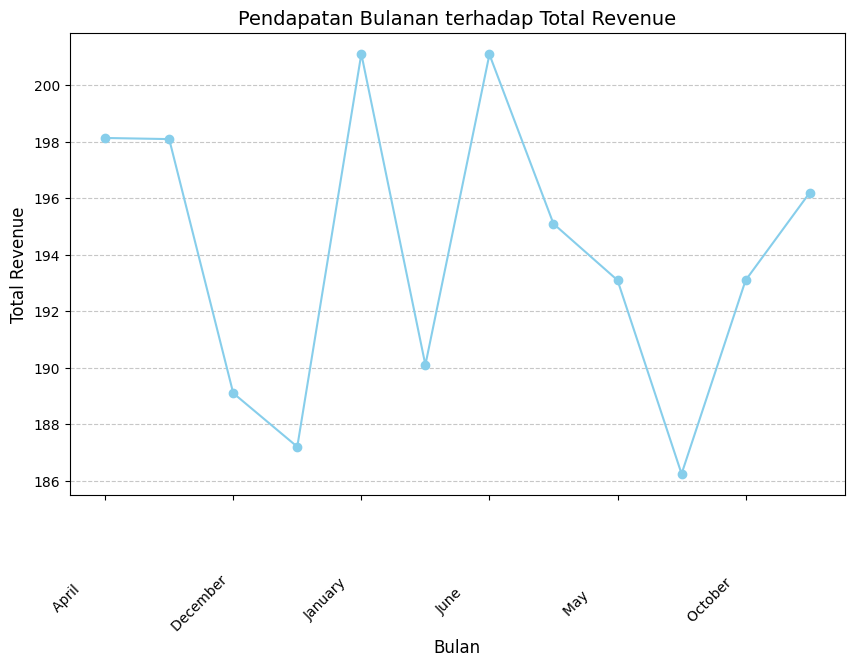

In [5]:
import matplotlib.pyplot as plt

# Define monthly_revenue by grouping the DataFrame by 'bulan' and summing 'total revenue'
monthly_revenue = df.groupby('bulan')['total revenue'].sum()

# Plotting the data as a line chart
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', color='skyblue', marker='o')
plt.title('Pendapatan Bulanan terhadap Total Revenue', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Train model xgboost

In [6]:
print(df.columns.tolist())

['transaksi_id', 'invoice_line_id', 'invoice_id', 'sk_track', 'album_title', 'artist_name', 'genre_name', 'media_name', 'sk_trackdate', 'kuartal', 'tanggal', 'bulan', 'tahun_angka', 'hari_dalam_bulan_angka', 'sk_employee', 'employee_name', 'sk_customer', 'customer_name', 'unit_price', 'quantity', 'totalrevenue', 'billing_country', 'total revenue']


In [7]:
from scipy.stats import f_oneway

# Contoh: Uji ANOVA pada 'total revenue' berdasarkan 'bulan'
anova_result = f_oneway(*(df[df['bulan'] == month]['total revenue'] for month in df['bulan'].unique()))
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

F-statistic: 3.4789272704663956
p-value: 7.763794035162483e-05


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Pilih fitur yang relevan untuk prediksi
features = ['unit_price', 'quantity', 'tahun_angka', 'hari_dalam_bulan_angka', 'bulan', 'genre_name', 'billing_country']
target = 'total revenue'

# Encode fitur kategorikal
df_encoded = df.copy()
label_encoders = {}
for col in ['bulan', 'genre_name', 'billing_country']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Pisahkan fitur dan target
X = df_encoded[features]
y = df_encoded[target]

# # Bagi data menjadi data latih dan data uji
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Buat model XGBoost
# model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# # Latih model
# model.fit(X_train, y_train)

# # Prediksi pada data uji
# y_pred = model.predict(X_test)

# # Hitung RMSE
# mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
# rmse = mse ** 0.5  # Take the square root to get RMSE
# print(f"Root Mean Squared Error (RMSE): {rmse}")

In [9]:
import joblib

# # Simpan model ke file
# joblib.dump(model, 'xgboost_model.pkl')
joblib.dump(label_encoders, "label_encoders.pkl")

# print("Model telah disimpan sebagai 'xgboost_model.pkl'")

['label_encoders.pkl']

In [10]:
import pickle
with open('xgboost_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
# Membuat data baru untuk prediksi hingga tahun 2026
future_years = [2026]
future_data = []

for year in future_years:
    for month in range(1, 13):  # 12 bulan
        for day in range(1, 29):  # Menghindari masalah dengan jumlah hari dalam bulan
            future_data.append({
                'unit_price': 0.99,  # Asumsi harga unit tetap
                'quantity': 1,  # Asumsi jumlah tetap
                'tahun_angka': year,
                'hari_dalam_bulan_angka': day,
                'bulan': month,
                'genre_name': 17,  # Asumsi genre tetap
                'billing_country': 11  # Asumsi negara tetap
            })

# Membuat DataFrame dari data baru
future_df = pd.DataFrame(future_data)

# Encode fitur kategorikal menggunakan encoder yang sudah dilatih
for col in ['bulan', 'genre_name', 'billing_country']:
    # Handle unseen labels by mapping them to a default value (e.g., -1)
    future_df[col] = future_df[col].apply(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

# Prediksi menggunakan model
future_predictions = model.predict(future_df)

# Menambahkan prediksi ke DataFrame
future_df['predicted_total_revenue'] = future_predictions

# Menampilkan beberapa hasil prediksi
print(future_df[['tahun_angka', 'bulan', 'hari_dalam_bulan_angka', 'predicted_total_revenue']].head())

   tahun_angka  bulan  hari_dalam_bulan_angka  predicted_total_revenue
0         2026     -1                       1                 0.990005
1         2026     -1                       2                 0.990005
2         2026     -1                       3                 0.990005
3         2026     -1                       4                 0.990005
4         2026     -1                       5                 0.990005


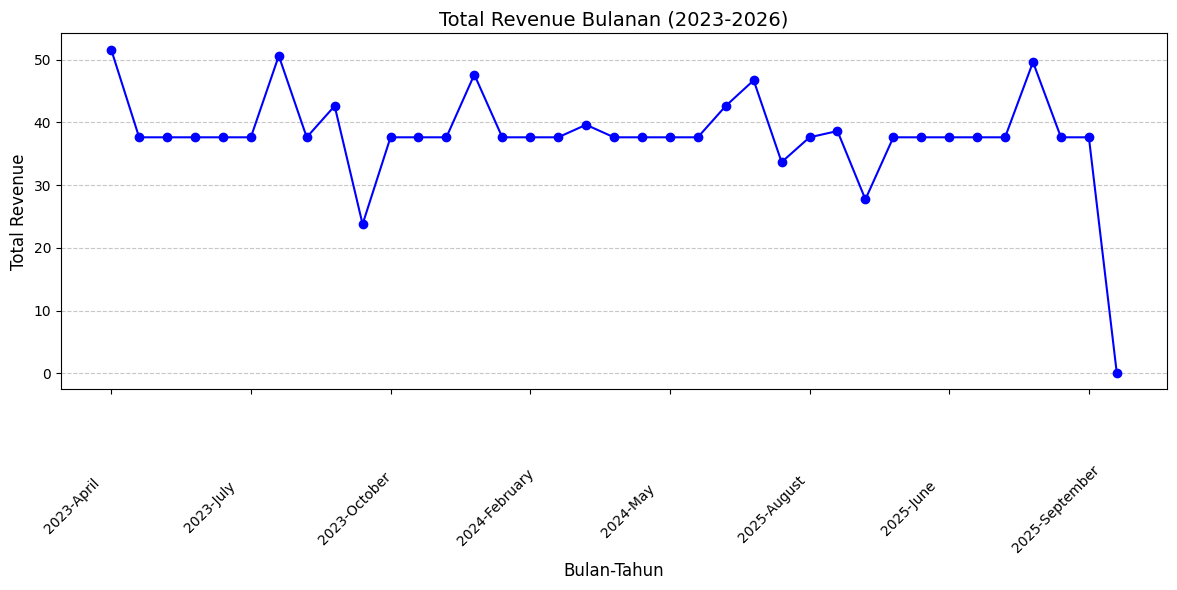

In [12]:
import matplotlib.pyplot as plt

# Filter data untuk tahun 2023 hingga 2026
filtered_df = df[(df['tahun_angka'] >= 2023) & (df['tahun_angka'] <= 2026)]

# Gabungkan data asli dengan data prediksi
combined_df = pd.concat([filtered_df, future_df], ignore_index=True)

# Kelompokkan data berdasarkan tahun dan bulan, lalu hitung total revenue
combined_df['bulan_tahun'] = combined_df['tahun_angka'].astype(str) + '-' + combined_df['bulan'].astype(str).str.zfill(2)
monthly_revenue_combined = combined_df.groupby('bulan_tahun')['total revenue'].sum()

# Plot grafik line chart
plt.figure(figsize=(12, 6))
monthly_revenue_combined.plot(kind='line', color='blue', marker='o')
plt.title('Total Revenue Bulanan (2023-2026)', fontsize=14)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [13]:
print(X)

      unit_price  quantity  tahun_angka  hari_dalam_bulan_angka  bulan  \
0           0.99         1         2021                       1      4   
1           0.99         1         2021                       1      4   
2           0.99         1         2021                       2      4   
3           0.99         1         2021                       2      4   
4           0.99         1         2021                       2      4   
...          ...       ...          ...                     ...    ...   
2235        0.99         1         2025                      14      2   
2236        0.99         1         2025                      14      2   
2237        0.99         1         2025                      14      2   
2238        0.99         1         2025                      14      2   
2239        1.99         1         2025                      22      2   

      genre_name  billing_country  
0             17               11  
1             17               11  
2  

In [14]:
# Terapkan model ke dataset untuk memprediksi nilai
predicted_values = model.predict(X)


# Tambahkan kolom prediksi ke dataset
df['predicted_total_revenue'] = predicted_values

# Tampilkan beberapa hasil prediksi
print(df[['unit_price', 'quantity', 'total revenue', 'predicted_total_revenue']].head())



   unit_price  quantity  total revenue  predicted_total_revenue
0        0.99         1           0.99                 0.990005
1        0.99         1           0.99                 0.990005
2        0.99         1           0.99                 0.990005
3        0.99         1           0.99                 0.990005
4        0.99         1           0.99                 0.990005


In [15]:
#evaluasi model
